#Imports and Data

In [1]:
import pandas as pd
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim import models

nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')


filepath_adhd = "/content/drive/MyDrive/adhdreddit/FinalData/adhd_posts_cleaned.csv"
#Read documents
df = pd.read_csv(filepath_adhd, error_bad_lines=False)
df = df.drop(columns = ["title","selftext","content_copy","Unnamed: 0"])

#Remove certain words 
meds_keywords = ["vyvanse","adderall","concerta","ritalin","dextroamphetamine","strattera","stimulant","stimulants","nonstimulant","nonstimulants", "adderal","wellbutrin", "atomoxetine","medikinet","elvanse","methylphenidate","focalin","dexedrine"]
meds = {key : "medication " for key in meds_keywords}
other = {'adhd': '',"\badd\b":"","\bxr\b":"","\n":" ","mg":"","\bla\b":"","\ber\b":"","\bir\b":""}
keywords ={**meds,** other}
df["content"] = df["content"].str.lower()
df["content"]= df["content"].replace(meds, regex= True)
df["content"]= df["content"].replace(other, regex= True)

#make posts into list of documents
docs = df["content"].tolist()
# Tokenize the documents.
# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs)):
    docs[idx] = docs[idx].lower()  # Convert to lowercase.
    docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.



# remove stop words
stop_words = stopwords.words('english')

docs = [[word.lower() for word in doc if word.isalpha()] for doc in docs]

docs = [[word for word in doc if word not in stop_words] for doc in docs]

# Remove numbers, but not words that contain numbers.
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

# Remove words that are only one character.
docs = [[token for token in doc if len(token) > 1] for doc in docs]

# Lemmatize the documents.
lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

phrases = Phrases(docs, min_count=1000, threshold=2,delimiter=b' ')
bigrams = Phraser(phrases)
bigram_token = []
for sent in docs:
    bigram_token.append(bigrams[sent])

print(bigram_token)
# Create a corpus from a list of texts
common_dictionary = Dictionary(docs)
common_corpus = [common_dictionary.doc2bow(text) for text in docs]





[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#Finding number of topics


In [ ]:
from gensim.models import CoherenceModel

topics = [1,5,10,15,20,25,30,35,40,45]
perplexity = []
coherence = []
models = []
for number in topics:
  print(number)
  lda_model = LdaModel(corpus = common_corpus,id2word = common_dictionary ,num_topics=number,random_state=50)
  perplexity_lda = lda_model.log_perplexity(common_corpus)
  perplexity.append(perplexity_lda)# a measure of how good the model is. lower the better.
  models.append(lda_model)

  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=common_dictionary, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  coherence.append(coherence_lda)
  print('\nCoherence Score: ', coherence_lda)




In [ ]:
coherence = [0.30034375022578197,0.373593164512215,
             0.40827578747584453,0.4264087068121621,
             0.44107807274633537,0.44076190509321306,
             0.4503648342916621,0.4492334660754853,
             0.4212682881309395,0.41167487467296066]

topics = [1,5,10,15,20,25,30,35,40,45]


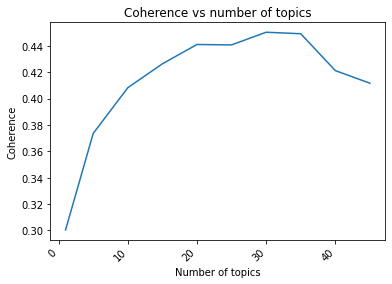

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


ax = sns.lineplot(x=topics, y=coherence)
plt.xticks(rotation=45, ha='right')
sns.color_palette("Blues", as_cmap=True)
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.title("Coherence vs number of topics")
plt.show()

In [ ]:
#Plotting coherence and perplexity
models[6].show_topics(num_topics=50, num_words=5,formatted=False)



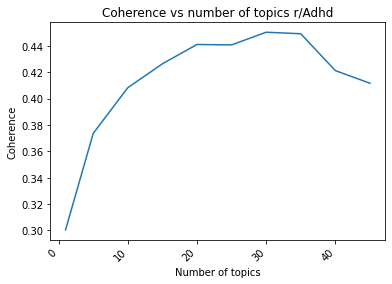

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


ax = sns.lineplot(x=topics, y=coherence)
plt.xticks(rotation=45, ha='right')
sns.color_palette("Blues", as_cmap=True)
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.title("Coherence vs number of topics r/Adhd")
plt.show()

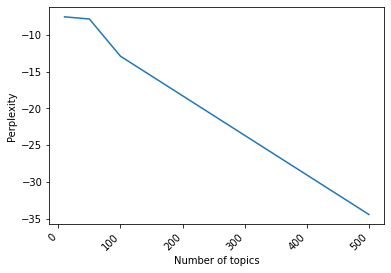

In [ ]:

ax = sns.lineplot(x=topics, y=perplexity)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Number of topics")
plt.title("Perplexity vs number of topics")
plt.ylabel("Perplexity")
plt.show()

In [ ]:
from gensim.models import CoherenceModel

topics = [10,15,20,25,30,40]
perplexity = []
coherence = []
models = []
for number in topics:
  print(number)
  lda_model = LdaModel(corpus = common_corpus,id2word = common_dictionary ,num_topics=number,random_state=50)
  perplexity_lda = lda_model.log_perplexity(common_corpus)
  perplexity.append(perplexity_lda)# a measure of how good the model is. lower the better.
  models.append(lda_model)

  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=common_dictionary, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  coherence.append(coherence_lda)
  print('\nCoherence Score: ', coherence_lda)
  print("Topics for", number, lda_model.show_topics(num_topics=50, num_words=5,formatted=False))




10

Coherence Score:  0.4111919282421684
Topics for 10 [(0, [('eat', 0.022237113), ('food', 0.019611962), ('eating', 0.016803883), ('weight', 0.010720405), ('water', 0.0080651855)]), (1, [('get', 0.024650062), ('day', 0.023307566), ('time', 0.02105225), ('thing', 0.015853804), ('work', 0.015782978)]), (2, [('month', 0.017816477), ('week', 0.013023226), ('get', 0.013011504), ('got', 0.011500628), ('back', 0.010158597)]), (3, [('like', 0.037090275), ('feel', 0.024060415), ('thing', 0.018230349), ('know', 0.017207079), ('people', 0.016210508)]), (4, [('school', 0.031621035), ('year', 0.016196284), ('class', 0.015591117), ('time', 0.01416679), ('get', 0.012815676)]), (5, [('game', 0.0122224325), ('video', 0.0114328945), ('book', 0.01016143), ('use', 0.009128646), ('read', 0.009087699)]), (6, [('job', 0.03092622), ('work', 0.020425336), ('year', 0.0119332), ('kid', 0.010215979), ('home', 0.009341314)]), (7, [('life', 0.02034289), ('feel', 0.01650521), ('like', 0.01265092), ('thing', 0.01198

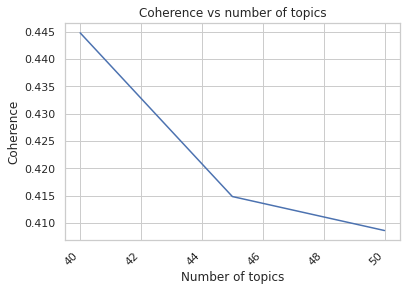

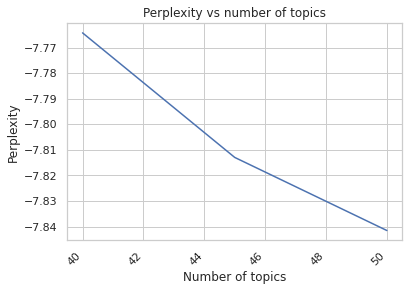

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.color_palette("Blues", as_cmap=True)


ax = sns.lineplot(x=topics, y=coherence)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.title("Coherence vs number of topics")
plt.show()

ax = sns.lineplot(x=topics, y=perplexity)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Number of topics")
plt.title("Perplexity vs number of topics")
plt.ylabel("Perplexity")
plt.show()

In [ ]:
from gensim.models import CoherenceModel

topics = [35,37,38,39,40,45,50]
perplexity = []
coherence = []
models = []
for number in topics:
  print(number)
  lda_model = LdaModel(corpus = common_corpus,id2word = common_dictionary ,num_topics=number,random_state=50)
  perplexity_lda = lda_model.log_perplexity(common_corpus)
  perplexity.append(perplexity_lda)# a measure of how good the model is. lower the better.
  models.append(lda_model)

  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=common_dictionary, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  coherence.append(coherence_lda)
  print('\nCoherence Score: ', coherence_lda)
  print("Topics for", number, lda_model.show_topics(num_topics=50, num_words=5,formatted=False))




35

Coherence Score:  0.4278354763401134
Topics for 35 [(0, [('job', 0.08466744), ('work', 0.03928211), ('working', 0.01651174), ('year', 0.016368803), ('new', 0.015560845)]), (1, [('remember', 0.056061536), ('phone', 0.047454126), ('memory', 0.036686346), ('forget', 0.035425738), ('call', 0.018154154)]), (2, [('day', 0.02909846), ('week', 0.028849764), ('got', 0.026220456), ('month', 0.024537178), ('today', 0.02196655)]), (3, [('people', 0.05634205), ('friend', 0.0150963385), ('lot', 0.014685859), ('experience', 0.013399289), ('also', 0.010665409)]), (4, [('school', 0.05845079), ('class', 0.029043017), ('year', 0.024061566), ('college', 0.020617772), ('grade', 0.015557119)]), (5, [('driving', 0.028971944), ('habit', 0.024290102), ('routine', 0.023498397), ('exercise', 0.022841183), ('car', 0.021451991)]), (6, [('executive', 0.08666474), ('dysfunction', 0.048847448), ('son', 0.0432007), ('function', 0.04198428), ('functioning', 0.02159255)]), (7, [('brain', 0.059976507), ('life', 0.040

# Chosen model


In [2]:
lda_model = LdaModel(corpus = common_corpus,id2word = common_dictionary ,num_topics=35,random_state=50)


In [3]:
from collections import Counter
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt


topics = lda_model.show_topics(num_topics=35,num_words=5,formatted=False)

data_flat = [w for w_list in common_texts for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(20, 2, figsize=(40,60), sharey=True, dpi=300)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]*4
for i, ax in enumerate(axes.flatten()):
    print(i)
    ax.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.5, label='Weights')
    ax.set_ylabel('Importance', color=cols[i])
    ax.set_ylim(0, 0.080)
    ax.set_title('Topic: ' + str(i), color=cols[i])
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], fontsize= 20,rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper right');
fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [ ]:
doc_topic = lda_model.get_document_topics(common_corpus)
tops = sorted(doc_topic, reverse=True, key=lambda doc: abs(dict(doc).get(1, 0.0)))

In [ ]:
import gensim
import numpy as np

all_topics_csr = gensim.matutils.corpus2csc(doc_topic)
all_topics_numpy = all_topics_csr.T.toarray()

In [ ]:
all_topics_numpy

In [ ]:
token2id = common_dictionary.token2id
doc_topic
def id2token(id):
 return list(token2id.keys())[list(token2id.values()).index(id)]


isnt


## Keywords

In [ ]:
lda_model.show_topics( num_words=5,formatted=False)




##Clusters

In [ ]:
# Plotting tools
!pip install pyLDAvis


import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, common_corpus, common_dictionary)
vis


/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
29    -0.170326  0.062522       1        1  14.839349
27    -0.172778  0.025690       2        1  10.143257
5     -0.177086  0.063411       3        1   7.151637
15    -0.152679 -0.067315       4        1   6.240994
14    -0.191953  0.009207       5        1   6.073000
24    -0.147639  0.126885       6        1   6.063672
34    -0.170898 -0.106168       7        1   4.386834
30    -0.078234  0.234855       8        1   3.660657
12    -0.002172  0.258877       9        1   3.622574
16    -0.167723 -0.127699      10        1   3.090417
26    -0.109949 -0.120290      11        1   3.079622
33    -0.108801  0.067750      12        1   2.822411
19    -0.116592 -0.064915      13        1   2.186458
20    -0.162299 -0.171357      14        1   2.178528
3     -0.076836 -0.118498      15        1   2.086832
31    -0.029117  0.050489      16        1   2.020331
21    -0.087374  0.073678      17        1   1.909697
23     0.007880  0.173872      18        1   1.760320
1      0.029793  0.081458      19        1   1.670851
6      0.024045 -0.057730      20        1   1.405410
17    -0.025950 -0.122554      21        1   1.250776
10     0.048760 -0.025940      22        1   1.228828
18     0.013814 -0.036119      23        1   1.202104
4      0.118207 -0.038562      24        1   1.148752
8     -0.002691 -0.052415      25        1   1.141875
28     0.164425  0.114342      26        1   1.075381
9      0.133686  0.117565      27        1   1.046057
11     0.219046  0.029134      28        1   0.873710
7      0.210494 -0.011731      29        1   0.780790
0      0.165716 -0.122029      30        1   0.740006
25     0.196956 -0.052408      31        1   0.673425
13     0.113474 -0.123715      32        1   0.639154
22     0.209257 -0.015459      33        1   0.614551
32     0.232136  0.067029      34        1   0.605460
2      0.263407 -0.121857      35        1   0.586282, topic_info=            Term           Freq          Total Category  logprob  loglift
61    medication  195435.000000  195435.000000  Default  30.0000  30.0000
90        anyone   65220.000000   65220.000000  Default  29.0000  29.0000
91          else   45739.000000   45739.000000  Default  28.0000  28.0000
103         work  104183.000000  104183.000000  Default  27.0000  27.0000
10           day  113355.000000  113355.000000  Default  26.0000  26.0000
...          ...            ...            ...      ...      ...      ...
3686     deficit     546.363360     981.774539  Topic35  -5.1437   4.5530
1021    friendly     661.543828    1690.133704  Topic35  -4.9524   4.2011
3761      pocket     512.434218    1310.976778  Topic35  -5.2078   4.1998
2500     contact     577.481716    2645.029610  Topic35  -5.0883   3.6174
623      scratch     407.024237     709.885602  Topic35  -5.4381   4.5829

[2366 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2693      3  0.997581  abilify
896       1  0.142824     able
896       2  0.231196     able
896       3  0.085823     able
896       4  0.067516     able
...     ...       ...      ...
1288     17  0.007796     zone
1288     20  0.000487     zone
1288     30  0.086733     zone
1288     31  0.001949     zone
1288     33  0.035083     zone

[11175 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[30, 28, 6, 16, 15, 25, 35, 31, 13, 17, 27, 34, 20, 21, 4, 32, 22, 24, 2, 7, 18, 11, 19, 5, 9, 29, 10, 12, 8, 1, 26, 14, 23, 33, 3])

##Worcloud

In [ ]:
def create_wordcloud(model, topic,color):
    text = {word: value for word, value in model.show_topic(topic,30)}
    wc = WordCloud(background_color="white", max_words=5,color_func=lambda *args, **kwargs: cols[i],)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic" + " "+ str(topic))
    plt.show()

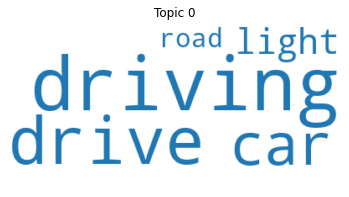

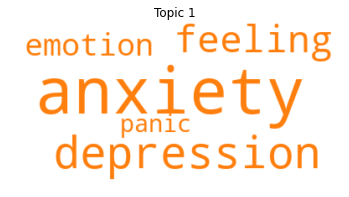

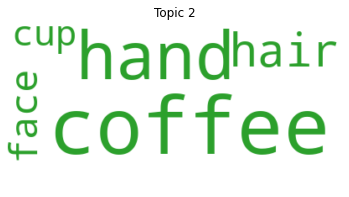

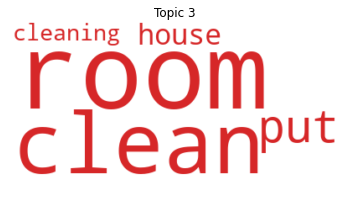

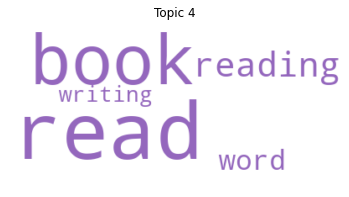

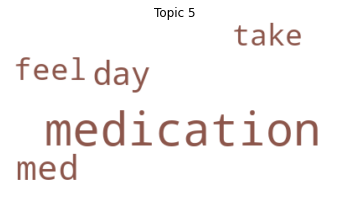

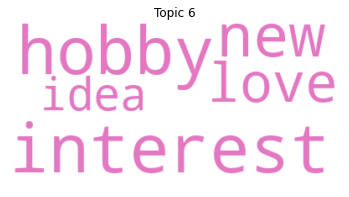

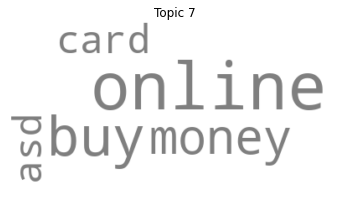

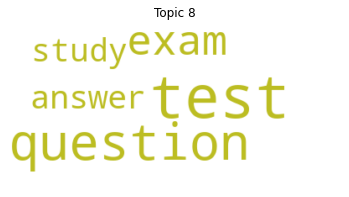

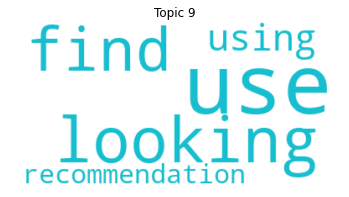

IndexError: ignored

In [ ]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
for i in range(0,20):
    create_wordcloud(lda_model, topic =i,color =  cols[i])

In [ ]:
docsVStopics = lda_model.transform(dtm)
docsVStopics = pd.DataFrame(docsVStopics, columns=["Topic"+str(i+1) for i in range(N_TOPICS)])
print("Created a (%dx%d) document-topic matrix." % (docsVStopics.shape[0], docsVStopics.shape[1]))
docsVStopics.head()